In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("netflix_reviews.csv")
# read : 파일을 읽는 함수

In [3]:
df.head()

# df.head = DataFrame 내의 처음 n 줄의 데이터 출력

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,"With basic plan, Netflix can consider to allow...",2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,Good app for series.,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,Laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,This app uses more data and it's asking withou...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,Since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908


In [5]:
df_sh = df.shape
df_index = df.columns

print(f"Shape of the dataset {df_sh}")
print(f"Columns in the dataset: {df_index}")

Shape of the dataset (117219, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [7]:
# 전처리 함수
import re

def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df['content'] = df['content'].apply(lambda x: preprocess_text(x))
# def preprocess_text : 텍스트를 정제하고 필요한 형태로 전처리

In [8]:
# 결측값이 포함된 행 제거
df_dropped_rows = df.dropna()

# 결측값이 포함된 열 제거
df_dropped_cols = df.dropna(axis=1)

In [ ]:
df_dropped_rows

C:\Users\USER\AppData\Local\Temp\ipykernel_24364\1271097762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')


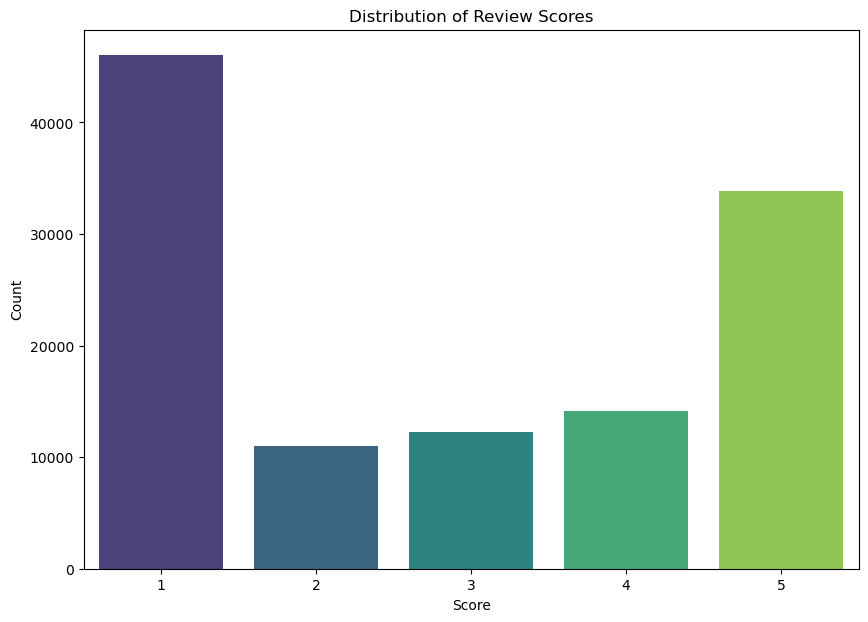

In [9]:
import seaborn as sns  # 시각화 라이브러리
import matplotlib.pyplot as plt  # 그래프 표시 라이브러리

# 리뷰 점수 빈도 계산
score_counts = df['score'].value_counts()

# 그래프 만들기
plt.figure(figsize=(10, 7))
# 색상 넣기는 강의 자료에서 찾았습니다. palette = 'viridis'
# X축에 점수, Y축에 해당 점수의 개수
sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')  
plt.xlabel('Score')  # X축 레이블
plt.ylabel('Count')  # Y축 레이블
plt.title('Distribution of Review Scores')  # 그래프 제목
plt.show()